# Preparation

## Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Clone Repository

In [ ]:
%cd /content/drive/MyDrive/Binus/MTI/DL/PTL_component

/content/drive/MyDrive/Binus/MTI/DL/PTL_component


In [ ]:
!git clone https://github.com/isirfanm/yolov7_PTL.git

Cloning into 'yolov7_PTL'...
remote: Enumerating objects: 647, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 647 (delta 9), reused 24 (delta 8), pack-reused 619 (from 1)
Receiving objects: 100% (647/647), 42.53 MiB | 15.44 MiB/s, done.
Resolving deltas: 100% (304/304), done.
Updating files: 100% (108/108), done.


In [ ]:
%cd /content/drive/MyDrive/Binus/MTI/DL/PTL_component/yolov7_PTL

/content/drive/MyDrive/Binus/MTI/DL/PTL_component/yolov7_PTL


In [ ]:
!git checkout ptl

Branch 'ptl' set up to track remote branch 'ptl' from 'origin'.
Switched to a new branch 'ptl'


In [ ]:
!git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0 (from 0)
Unpacking objects: 100% (5/5), 425 bytes | 3.00 KiB/s, done.
From https://github.com/isirfanm/yolov7_PTL
   7ee64ce..3a7edaa  ptl        -> origin/ptl
Updating 7ee64ce..3a7edaa
Fast-forward
 train.py          | 4 ++--
 utils/datasets.py | 2 +-
 2 files changed, 3 insertions(+), 3 deletions(-)


## Go to working dir

In [ ]:
%cd /content/drive/MyDrive/Binus/MTI/DL/PTL_component/furnas_dataset_v0.07

/content/drive/MyDrive/Binus/MTI/DL/PTL_component/furnas_dataset_v0.07


In [ ]:
!ls

all  data  imgs  split_dataset	test  test.csv	train  train.csv  utils


# Resize dataset image and label

## Resize Image

In [2]:
from PIL import Image
import os


def resize_images(image_dir, output_dir, target_resolution):
  # Iterate through files in the directory
  for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
      img_path = os.path.join(image_dir, filename)
      try:
        # Open the image
        img = Image.open(img_path)

        # Resize the image
        img_resized = img.resize(target_resolution)

        # Save the resized image to the output directory
        output_path = os.path.join(output_dir, filename)
        img_resized.save(output_path)
        print(f"Resized and saved: {filename}")

      except Exception as e:
        print(f"Error processing {filename}: {e}")


In [3]:
# Directory containing the images
image_dirs = ['train/images', 'test/images']
output_dir = 'all/images'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Desired resolution
target_resolution = (640, 640)

# resize images
for image_dir in image_dirs:
  print(f"Resizing images in directory: {image_dir}")
  resize_images(image_dir, output_dir, target_resolution)
  print(f"Resizing completed for directory: {image_dir}")


Resizing images in directory: train/images
Resized and saved: LTBSLPRS.ts-656#012.jpg
Resized and saved: LTFIGIBN1_LTFIGIBN2_T0554.ts-13085#034.jpg
Resized and saved: LTCMSRNS2_T0250.ts-16939#025.jpg
Resized and saved: LTIABIVP3_T0062.ts-12450#039.jpg
Resized and saved: LTFIGIVP3_LTFIGIVP4_T0200.ts-14958#010.jpg
Resized and saved: LTFIGIVP3_LTFIGIVP4_T0118.ts-14860#020.jpg
Resized and saved: LTFIGIBN3_LTFIGIBN4_T0402#00_08_17.jpg
Resized and saved: LTADRTMR1_LTADRTMR2_T0388_T0387.ts-10975#054.jpg
Resized and saved: LTANTSIM_T0060.ts-3076#016.jpg
Resized and saved: LTGUPMIC_T0369_T0607.ts-2#011.jpg
Resized and saved: LTRVDRIC_LTRVDROD_T0835.ts-1359#024.jpg
Resized and saved: LTCMSRNS2_T0001#00_07_33.jpg
Resized and saved: LTFIGIBN1_LTFIGIBN2_T0413.ts-13906#034.jpg
Resized and saved: LTFIGIBN3_LTFIGIBN4_T0290_T0403.ts-23866#042.jpg
Resized and saved: LTFIGIBN1_LTFIGIBN2_T0674.ts-13225#026.jpg
Resized and saved: LTMMHVDP_T0239.ts-3082#053.jpg
Resized and saved: LTCBABSL_T0401.ts-4#057.jpg

## Copy Label

In [4]:
import shutil

def copy_labels(label_dir, output_dir):
    # Iterate through files in the label directory
    for filename in os.listdir(label_dir):
      if filename.lower().endswith('.txt'): # Assuming labels are in .txt files
        label_path = os.path.join(label_dir, filename)
        output_path = os.path.join(output_dir, filename)
        try:
          # Copy the label file to the output directory
          shutil.copy2(label_path, output_path)
          print(f"Copied: {filename}")
        except Exception as e:
          print(f"Error copying {filename}: {e}")

In [5]:
# Directories containing the labels
label_dirs = ['train/labels', 'test/labels']
output_dir = 'all/labels'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)



In [6]:
# copy labels
for label_dir in label_dirs:
  print(f"Copying labels from directory: {label_dir}")
  copy_labels(label_dir, output_dir)
  print(f"Copying completed for directory: {label_dir}")

Copying labels from directory: train/labels
Copied: LTFIGIBN1_LTFIGIBN2_T1606_SEIBN#00_00_55.txt
Copied: LTELTIBN1_LTELTIBN2_T0160.ts-15504#046.txt
Copied: LTSMANIQ2_T0246_T0001.ts-41#001.txt
Copied: LTITBSSI_T0040.ts-1104#013.txt
Copied: LTFIGIBN1_LTFIGIBN2_T0674.ts-13225#033.txt
Copied: LTFURMMO_T0261#00_08_12.txt
Copied: LTCBABSL_T0401.ts-1#056.txt
Copied: LTADRTMR1_LTADRTMR2_T0388_T0387.ts-10975#037.txt
Copied: LTFIGIBN1_LTFIGIBN2_T1606_SEIBN#00_23_41.txt
Copied: LTFIGIVP3_T0556.ts-13414#057.txt
Copied: LTBFLCHP_LTARDCHP.ts-2920#056.txt
Copied: LTFIGIVP3_T0410.ts-14114#035.txt
Copied: LTIABIVP2_T0171.ts-16266#039.txt
Copied: LTGUPMIC_T0369_T0607.ts-181#007.txt
Copied: LTFIGIVP1_T0561.ts-13622#041.txt
Copied: LTCMSRNS1_T0231.ts-17031#008.txt
Copied: LTCMSRNS2_T0001#00_00_16.txt
Copied: LTIABIVP2_T0158.ts-3184#014.txt
Copied: LTFIGIBN1_LTFIGIBN2_T0674.ts-13225#013.txt
Copied: LTBDTSBA2_T0049#00_10_47.txt
Copied: LTFIGIVP3_T0611.ts-12968#063.txt
Copied: LTBHAPTU.ts-5115#032.txt
Copied

## [Not used] Resize Label

In [ ]:
# import shutil

# def resize_labels(label_dir, output_dir, original_resolution, target_resolution):
#     # Iterate through files in the directory
#     for filename in os.listdir(label_dir):
#         if filename.lower().endswith('.txt'): # Assuming labels are in .txt format
#             label_path = os.path.join(label_dir, filename)
#             output_path = os.path.join(output_dir, filename)

#             try:
#                 with open(label_path, 'r') as f_in, open(output_path, 'w') as f_out:
#                     for line in f_in:
#                         parts = line.strip().split()
#                         if len(parts) >= 5: # Assuming YOLO format: class x_center y_center width height
#                             class_id = parts[0]
#                             # Convert string coordinates to float
#                             x_center_orig = float(parts[1])
#                             y_center_orig = float(parts[2])
#                             width_orig = float(parts[3])
#                             height_orig = float(parts[4])

#                             # Calculate the scaling factors
#                             scale_x = target_resolution[0] / original_resolution[0]
#                             scale_y = target_resolution[1] / original_resolution[1]

#                             # Resize the coordinates and dimensions
#                             x_center_resized = x_center_orig * scale_x
#                             y_center_resized = y_center_orig * scale_y
#                             width_resized = width_orig * scale_x
#                             height_resized = height_orig * scale_y

#                             # Ensure coordinates are within the target resolution boundaries (optional but good practice)
#                             x_center_resized = max(0.0, min(1.0, x_center_resized))
#                             y_center_resized = max(0.0, min(1.0, y_center_resized))
#                             width_resized = max(0.0, min(1.0, width_resized))
#                             height_resized = max(0.0, min(1.0, height_resized))


#                             # Write the resized coordinates to the new file
#                             f_out.write(f"{class_id} {x_center_resized:.6f} {y_center_resized:.6f} {width_resized:.6f} {height_resized:.6f}\n")
#                         else:
#                              # If the line doesn't match the expected format, just copy it
#                              f_out.write(line)


#                 print(f"Resized and saved: {filename}")

#             except Exception as e:
#                 print(f"Error processing {filename}: {e}")


In [ ]:
# Directory containing the original labels
label_dirs = ['train/labels', 'test/labels']
output_label_dir = 'all/labels'

# Create output directory if it doesn't exist
os.makedirs(output_label_dir, exist_ok=True)

# Original resolution of the images (You need to know this or extract it)
# Assuming a consistent original resolution for the dataset
original_resolution = (1280, 720) # Replace with the actual original resolution

# Desired resolution (same as the resized images)
target_resolution = (640, 640)

# Resize labels
for label_dir in label_dirs:
    print(f"Resizing labels in directory: {label_dir}")
    resize_labels(label_dir, output_label_dir, original_resolution, target_resolution)
    print(f"Resizing completed for directory: {label_dir}")


In [ ]:
# import shutil

# def copy_labels(source_dir, target_dir):
#   # Copy files from source_dir to target_dir
#   for filename in os.listdir(source_dir):
#       source_path = os.path.join(source_dir, filename)
#       target_path = os.path.join(target_dir, filename)
#       if os.path.isfile(source_path):
#           shutil.copy2(source_path, target_path)
#           print(f"Copied: {filename}")

In [ ]:
# source_dirs = ['train/labels', 'test/labels']
# target_dir = 'all/labels'


# # Create target directory if it doesn't exist
# os.makedirs(target_dir, exist_ok=True)

# # copy labels
# for source_dir in source_dirs:
#   print(f"Copy labels in directory: {image_dir}")
#   copy_labels(source_dir, target_dir)
#   print(f"Copy completed for directory: {image_dir}")


Streaming output truncated to the last 5000 lines.
Copied: LTBSLPRS.ts-656#017.txt
Copied: LTFIGIBN1_LTFIGIBN2_T0674.ts-13225#054.txt
Copied: LTIBNTPR1_LTIBNTPR2_T0112.ts-1483#029.txt
Copied: LTFIGIBN1_LTFIGIBN2_T1587.ts-3937#033.txt
Copied: LTFIGIBN1_LTFIGIBN2_T0674.ts-13223#051.txt
Copied: LTIABIVP1_T0040#00:03:51.txt
Copied: LTADRVDP.ts-3098#025.txt
Copied: LTGUPMIC_T0369_T0607.ts-181#044.txt
Copied: LTIBNTPR1_LTIBNTPR2_T0112.ts-1483#007.txt
Copied: LTIABIVP1_T0051.ts-12260#010.txt
Copied: LTFIGIVP3_T0556.ts-13418#036.txt
Copied: LTIABIVP2_T0129.ts-3168#037.txt
Copied: LTFIGIVP3_T0556.ts-13418#015.txt
Copied: LTRVDBPX1_T0429_LTRVDBPX2_T0431.ts-5341#015.txt
Copied: LTFIGIBN1_LTFIGIBN2_T0674.ts-13223#008.txt
Copied: LTFIGIBN3_LTFIGIBN4_T0834.ts-12142#063.txt
Copied: LTFIGIBN3_LTFIGIBN4_T0402#00:32:10.txt
Copied: LTFIGIVP3_LTFIGIVP4_T0118.ts-14858#069.txt
Copied: LTFIGIBN1_LTFIGIBN2_T1606_SEIBN#00:07:02.txt
Copied: LTRVDROD_T0575_LTCTMPQE_T0452.ts-5294#041.txt
Copied: LTRVDROD_T0575_LT

## Sample data

In [7]:
# prompt: plot label to image for sample data

import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_image_with_labels(image_path, label_path, class_names):
    """
    Plots an image and overlays the bounding boxes from a YOLO format label file.

    Args:
        image_path (str): Path to the image file.
        label_path (str): Path to the YOLO format label file (.txt).
        class_names (list): A list of class names, where the index corresponds
                            to the class ID in the label file.
    """
    try:
        img = Image.open(image_path)
        img_width, img_height = img.size

        fig, ax = plt.subplots(1)
        ax.imshow(img)

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) >= 5:
                        class_id = int(parts[0])
                        x_center = float(parts[1])
                        y_center = float(parts[2])
                        width = float(parts[3])
                        height = float(parts[4])

                        # Convert YOLO format (normalized center, width, height) to
                        # matplotlib format (top-left x, top-left y, width, height)
                        box_width = width * img_width
                        box_height = height * img_height
                        top_left_x = (x_center - width / 2) * img_width
                        top_left_y = (y_center - height / 2) * img_height

                        # Create a rectangle patch
                        rect = patches.Rectangle(
                            (top_left_x, top_left_y),
                            box_width,
                            box_height,
                            linewidth=1,
                            edgecolor='r', # You can customize color
                            facecolor='none'
                        )

                        # Add the patch to the Axes
                        ax.add_patch(rect)

                        # Add class label text
                        if class_id < len(class_names):
                            class_label = class_names[class_id]
                            plt.text(
                                top_left_x,
                                top_left_y - 5, # Position text slightly above the box
                                class_label,
                                color='red', # You can customize color
                                fontsize=8,
                                bbox=dict(facecolor='white', alpha=0.5, pad=0)
                            )
                        else:
                            print(f"Warning: Class ID {class_id} is out of bounds for class names.")

        plt.axis('off') # Hide axes
        plt.show()

    except Exception as e:
        print(f"Error plotting image {image_path} or label {label_path}: {e}")


In [8]:
# Example usage:
# Define your class names based on your dataset.
# The order should match the class IDs in your label files (0, 1, 2, ...)
class_names = [
        "baliser_ok",
        "baliser_aok",
        "baliser_nok",
        "insulator_ok",
        "insulator_nok",
        "bird_nest",
        "stockbridge_ok",
        "stockbridge_nok",
        "spacer_ok",
        "spacer_nok",
        "insulator_unk",
] # Replace with your actual class names

In [9]:
# Specify a sample image and its corresponding label file
sample_image_filename = 'LTADRTMR1_LTADRTMR2_T0388_T0387.ts-10974#005.jpg' # Replace with an actual image filename from your dataset
sample_label_filename = 'LTADRTMR1_LTADRTMR2_T0388_T0387.ts-10974#005.txt' # Replace with the corresponding label filename

# Construct the full paths to the sample image and label
# Adjust these paths based on where your images and labels are located
# For example, if you want to plot from the resized 'all' directory:
sample_image_path = os.path.join('all/images', sample_image_filename)
sample_label_path = os.path.join('all/labels', sample_label_filename)
# sample_image_path = os.path.join('train/images', sample_image_filename)
# sample_label_path = os.path.join('train/labels', sample_label_filename)

Plotting image: LTADRTMR1_LTADRTMR2_T0388_T0387.ts-10974#005.jpg


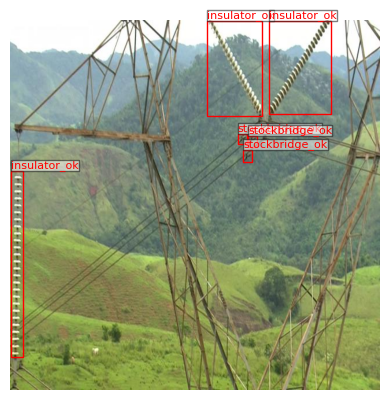

In [10]:
# Check if the sample files exist before trying to plot
if os.path.exists(sample_image_path) and os.path.exists(sample_label_path):
    print(f"Plotting image: {sample_image_filename}")
    plot_image_with_labels(sample_image_path, sample_label_path, class_names)
elif os.path.exists(sample_image_path):
    print(f"Image found: {sample_image_filename}, but label file not found: {sample_label_filename}. Plotting image without labels.")
    try:
        img = Image.open(sample_image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error plotting image {sample_image_path}: {e}")

else:
    print(f"Sample image not found at: {sample_image_path}")
    print("Please update 'sample_image_filename' and 'sample_label_filename' to point to existing files in your dataset.")



In [ ]:
# To plot multiple sample images, you could loop through a list of filenames:
# sample_files_to_plot = [
#     ('image1.jpg', 'image1.txt'),
#     ('image2.png', 'image2.txt'),
#     # Add more tuples of (image_filename, label_filename)
# ]

# for img_file, label_file in sample_files_to_plot:
#     img_path = os.path.join('all/images', img_file)
#     label_path = os.path.join('all/labels', label_file)
#     if os.path.exists(img_path) and os.path.exists(label_path):
#          print(f"Plotting image: {img_file}")
#          plot_image_with_labels(img_path, label_path, class_names)
#     elif os.path.exists(img_path):
#          print(f"Image found: {img_file}, but label file not found: {label_file}. Plotting image without labels.")
#          try:
#              img = Image.open(img_path)
#              plt.imshow(img)
#              plt.axis('off')
#              plt.show()
#          except Exception as e:
#              print(f"Error plotting image {img_path}: {e}")
#     else:
#          print(f"Sample image not found at: {img_path}")


# Split Dataset

## Make directory

In [ ]:
%cd /content/drive/MyDrive/Binus/MTI/DL/PTL_component/furnas_dataset_v0.07

/content/drive/MyDrive/Binus/MTI/DL/PTL_component/furnas_dataset_v0.07


## Collect Information

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the main data directory
data_dir = 'all' # Assuming your images are in all/images and labels in all/labels

# Define the output directories for the splits
train_dir = 'split_dataset/train'
val_dir = 'split_dataset/val'
test_dir = 'split_dataset/test'



In [2]:
# Create the split directories
os.makedirs(os.path.join(train_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'labels'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'labels'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'labels'), exist_ok=True)

In [3]:
# Get list of image files
image_files = [f for f in os.listdir(os.path.join(data_dir, 'images')) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

In [4]:
# Create a list of (image_filename, label_filename) pairs
data_pairs = []
for img_file in image_files:
    # Assuming label filenames have the same base name but with .txt extension
    label_file = os.path.splitext(img_file)[0] + '.txt'
    data_pairs.append((img_file, label_file))

In [5]:
# Function to get class distribution from a label file
def get_classes_from_label(label_filepath):
    classes = []
    if os.path.exists(label_filepath):
        with open(label_filepath, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if parts:
                    classes.append(int(parts[0])) # Assuming class ID is the first element
    return classes

In [6]:
# # Collect class information for stratification
# all_classes = []
# for _, label_file in data_pairs:
#     label_filepath = os.path.join(data_dir, 'labels', label_file)
#     all_classes.extend(get_classes_from_label(label_filepath))

In [7]:
test_size = 0.15
val_size = 0.15/(1-test_size)

In [8]:
test_size, val_size

(0.15, 0.17647058823529413)

## Split Dataset

In [9]:
# Create a list of labels corresponding to the data pairs for stratification
# We need to assign a "label" to each data pair for stratification.
# A simple approach is to use the class ID of the first object in the label file.
# If a file has multiple classes, this might not be perfect for perfect balance across all classes,
# but it's a common starting point for stratification with multi-object images.
# A more robust approach might involve creating dummy variables for each class present in a file.
stratify_labels = []
for _, label_file in data_pairs:
    label_filepath = os.path.join(data_dir, 'labels', label_file)
    classes_in_file = get_classes_from_label(label_filepath)
    if classes_in_file:
        # Use the first class ID in the file for stratification
        stratify_labels.append(classes_in_file[0])
    else:
        # Assign a placeholder for files with no labels (if any)
        stratify_labels.append(-1) # Use a value that doesn't conflict with your actual class IDs

In [10]:
# Convert to numpy array for train_test_split
import numpy as np
stratify_labels = np.array(stratify_labels)
data_pairs = np.array(data_pairs) # Convert data_pairs to numpy array as well

In [11]:
# Split data_pairs into training and testing with stratification
train_val_pairs_indices, test_pairs_indices = train_test_split(
    np.arange(len(data_pairs)),
    test_size=test_size,
    random_state=42,
    stratify=stratify_labels
)
train_val_pairs = data_pairs[train_val_pairs_indices].tolist()
test_pairs = data_pairs[test_pairs_indices].tolist()
train_val_stratify_labels = stratify_labels[train_val_pairs_indices]


# Split training+validation into training and validation with stratification
train_pairs_indices, val_pairs_indices = train_test_split(
    np.arange(len(train_val_pairs)),
    test_size=val_size,
    random_state=42,
    stratify=train_val_stratify_labels
)
train_pairs = np.array(train_val_pairs)[train_pairs_indices].tolist()
val_pairs = np.array(train_val_pairs)[val_pairs_indices].tolist()

In [12]:
# # If there are no labels or no classes, proceed without stratification
# if not all_classes:
#     print("Warning: No label information found for stratification. Splitting without stratification.")
#     # Split data_pairs into training and testing
#     train_val_pairs, test_pairs = train_test_split(data_pairs, test_size=test_size, random_state=42)
#     # Split training+validation into training and validation
#     train_pairs, val_pairs = train_test_split(train_val_pairs, test_size=val_size, random_state=42)
# else:
#     # Create a list of labels corresponding to the data pairs for stratification
#     # We need to assign a "label" to each data pair for stratification.
#     # A simple approach is to use the class ID of the first object in the label file.
#     # If a file has multiple classes, this might not be perfect for perfect balance across all classes,
#     # but it's a common starting point for stratification with multi-object images.
#     # A more robust approach might involve creating dummy variables for each class present in a file.
#     stratify_labels = []
#     for _, label_file in data_pairs:
#         label_filepath = os.path.join(data_dir, 'labels', label_file)
#         classes_in_file = get_classes_from_label(label_filepath)
#         if classes_in_file:
#             # Use the first class ID in the file for stratification
#             stratify_labels.append(classes_in_file[0])
#         else:
#             # Assign a placeholder for files with no labels (if any)
#             stratify_labels.append(-1) # Use a value that doesn't conflict with your actual class IDs

#     # Convert to numpy array for train_test_split
#     import numpy as np
#     stratify_labels = np.array(stratify_labels)
#     data_pairs = np.array(data_pairs) # Convert data_pairs to numpy array as well

#     # Split data_pairs into training and testing with stratification
#     train_val_pairs_indices, test_pairs_indices = train_test_split(
#         np.arange(len(data_pairs)),
#         test_size=test_size,
#         random_state=42,
#         stratify=stratify_labels
#     )
#     train_val_pairs = data_pairs[train_val_pairs_indices].tolist()
#     test_pairs = data_pairs[test_pairs_indices].tolist()
#     train_val_stratify_labels = stratify_labels[train_val_pairs_indices]


#     # Split training+validation into training and validation with stratification
#     train_pairs_indices, val_pairs_indices = train_test_split(
#         np.arange(len(train_val_pairs)),
#         test_size=val_size,
#         random_state=42,
#         stratify=train_val_stratify_labels
#     )
#     train_pairs = np.array(train_val_pairs)[train_pairs_indices].tolist()
#     val_pairs = np.array(train_val_pairs)[val_pairs_indices].tolist()


In [13]:
# Function to copy files
def copy_files(file_pairs, source_img_dir, source_label_dir, target_img_dir, target_label_dir):
    for img_file, label_file in file_pairs:
        # Copy image
        source_img_path = os.path.join(source_img_dir, img_file)
        target_img_path = os.path.join(target_img_dir, img_file)
        if os.path.exists(source_img_path):
            shutil.copy2(source_img_path, target_img_path)

        # Copy label
        source_label_path = os.path.join(source_label_dir, label_file)
        target_label_path = os.path.join(target_label_dir, label_file)
        if os.path.exists(source_label_path):
            shutil.copy2(source_label_path, target_label_path)

In [14]:
# Copy files to their respective directories
print("Copying training files...")
copy_files(train_pairs, os.path.join(data_dir, 'images'), os.path.join(data_dir, 'labels'), os.path.join(train_dir, 'images'), os.path.join(train_dir, 'labels'))

print("Copying validation files...")
copy_files(val_pairs, os.path.join(data_dir, 'images'), os.path.join(data_dir, 'labels'), os.path.join(val_dir, 'images'), os.path.join(val_dir, 'labels'))

print("Copying testing files...")
copy_files(test_pairs, os.path.join(data_dir, 'images'), os.path.join(data_dir, 'labels'), os.path.join(test_dir, 'images'), os.path.join(test_dir, 'labels'))

Copying training files...
Copying validation files...
Copying testing files...


In [15]:
print("Dataset splitting completed.")
print(f"Training set size: {len(train_pairs)} images")
print(f"Validation set size: {len(val_pairs)} images")
print(f"Testing set size: {len(test_pairs)} images")

Dataset splitting completed.
Training set size: 4405 images
Validation set size: 945 images
Testing set size: 945 images


## Class Distribution

In [16]:
class_names = [
        "baliser_ok",
        "baliser_aok",
        "baliser_nok",
        "insulator_ok",
        "insulator_nok",
        "bird_nest",
        "stockbridge_ok",
        "stockbridge_nok",
        "spacer_ok",
        "spacer_nok",
        "insulator_unk",
]

In [17]:
# Function to get class distribution from a directory of label files
def get_class_distribution(label_dir):
    class_counts = {}
    if not os.path.exists(label_dir):
        return class_counts

    for filename in os.listdir(label_dir):
        if filename.lower().endswith('.txt'):
            label_filepath = os.path.join(label_dir, filename)
            try:
                with open(label_filepath, 'r') as f:
                    for line in f:
                        parts = line.strip().split()
                        if parts:
                            class_id = int(parts[0])
                            class_counts[class_id] = class_counts.get(class_id, 0) + 1
            except Exception as e:
                print(f"Error reading {filename}: {e}")
    return class_counts



In [18]:
# Get and print class distribution for each split
print("\nClass Distribution after Split:")

train_class_counts = get_class_distribution(os.path.join(train_dir, 'labels'))
print("\nTraining Set Class Distribution:")
grand_total = 0
if train_class_counts:
    total = 0
    for class_id, count in sorted(train_class_counts.items()):
        print(f"Class {class_id}-{class_names[class_id]}: {count}")
        total += count
    print(f"Total: {total}")
    grand_total += total
else:
    print("No labels found in the training set.")

val_class_counts = get_class_distribution(os.path.join(val_dir, 'labels'))
print("\nValidation Set Class Distribution:")
if val_class_counts:
    total = 0
    for class_id, count in sorted(val_class_counts.items()):
        print(f"Class {class_id}-{class_names[class_id]}: {count}")
        total += count
    print(f"Total: {total}")
    grand_total += total
else:
    print("No labels found in the validation set.")

test_class_counts = get_class_distribution(os.path.join(test_dir, 'labels'))
print("\nTesting Set Class Distribution:")
if test_class_counts:
    total = 0
    for class_id, count in sorted(test_class_counts.items()):
        print(f"Class {class_id}-{class_names[class_id]}: {count}")
        total += count
    print(f"Total: {total}")
    grand_total += total
else:
    print("No labels found in the testing set.")

print(f"\nGrand Total: {grand_total}")


Class Distribution after Split:

Training Set Class Distribution:
Class 0-baliser_ok: 93
Class 1-baliser_aok: 264
Class 2-baliser_nok: 137
Class 3-insulator_ok: 6105
Class 4-insulator_nok: 1433
Class 5-bird_nest: 257
Class 6-stockbridge_ok: 2222
Class 8-spacer_ok: 788
Class 9-spacer_nok: 17
Class 10-insulator_unk: 1240
Total: 12556

Validation Set Class Distribution:
Class 0-baliser_ok: 26
Class 1-baliser_aok: 52
Class 2-baliser_nok: 38
Class 3-insulator_ok: 1268
Class 4-insulator_nok: 320
Class 5-bird_nest: 59
Class 6-stockbridge_ok: 398
Class 8-spacer_ok: 173
Class 9-spacer_nok: 3
Class 10-insulator_unk: 270
Total: 2607

Testing Set Class Distribution:
Class 0-baliser_ok: 17
Class 1-baliser_aok: 49
Class 2-baliser_nok: 29
Class 3-insulator_ok: 1302
Class 4-insulator_nok: 301
Class 5-bird_nest: 55
Class 6-stockbridge_ok: 425
Class 8-spacer_ok: 155
Class 9-spacer_nok: 3
Class 10-insulator_unk: 309
Total: 2645

Grand Total: 17808
